In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
#import sys
#sys.path.append('C:/Users/anton/git_repository/Exercise03')

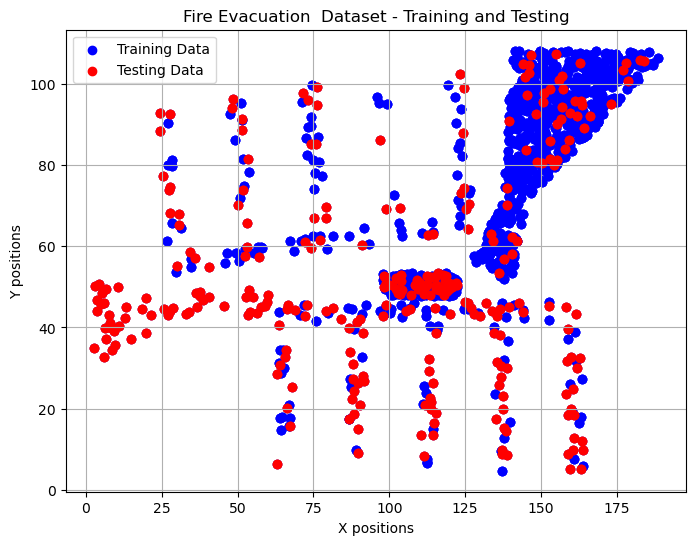

In [6]:
# Load the training and testing datasets
train_data = np.load("FireEvac_train_set.npy")
test_data = np.load("FireEvac_test_set.npy")

#print("train data shape : ", train_data.shape)
#print("test data shape : ", test_data.shape)

# Extract x and y positions from the datasets
x_train, y_train = train_data[:, 0], train_data[:, 1]
x_test, y_test = test_data[:, 0], test_data[:, 1]

        #Visualization (Q1)
# Create a scatter plot for the training dataset
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, c='blue', label='Training Data')

# Add the testing dataset to the plot
plt.scatter(x_test, y_test, c='red', label='Testing Data')

# Set plot labels and title
plt.xlabel('X positions')
plt.ylabel('Y positions')
plt.title('Fire Evacuation  Dataset - Training and Testing')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

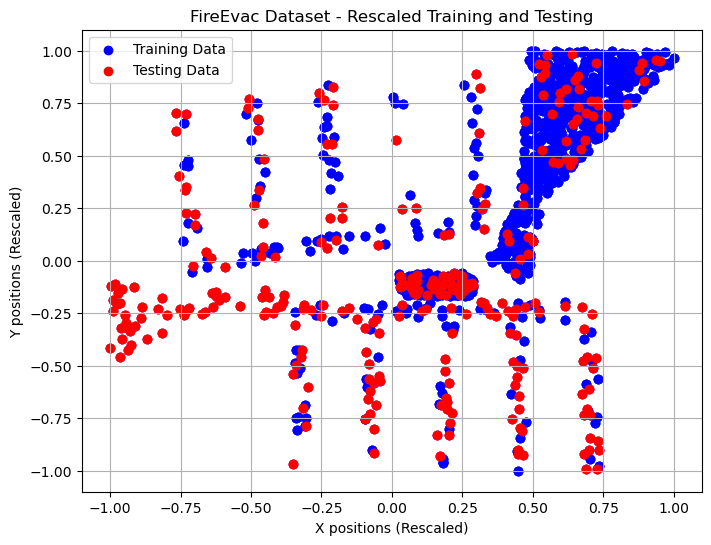

In [7]:
# Rescale the x and y values of the training dataset to [-1, 1]
x_train_min, y_train_min = np.min(x_train), np.min(y_train)
x_train_max, y_train_max = np.max(x_train), np.max(y_train)

x_train_scaled = -1 + (2 * (x_train - x_train_min) / (x_train_max - x_train_min))
y_train_scaled = -1 + (2 * (y_train - y_train_min) / (y_train_max - y_train_min))

# Rescale the x and y values of the testing dataset to [-1, 1]
test_x_scaled = -1 + (2 * (test_x - x_train_min) / (x_train_max - x_train_min))
test_y_scaled = -1 + (2 * (test_y - y_train_min) / (y_train_max - y_train_min))

# Create a scatter plot for the training dataset
plt.figure(figsize=(8, 6))
plt.scatter(x_train_scaled, y_train_scaled, c='blue', label='Training Data')

# Add the testing dataset to the plot
plt.scatter(test_x_scaled, test_y_scaled, c='red', label='Testing Data')

# Set plot labels and title
plt.xlabel('X positions (Rescaled)')
plt.ylabel('Y positions (Rescaled)')
plt.title('FireEvac Dataset - Rescaled Training and Testing')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()